In [ ]:
!pip install python_tsp

In [4]:
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming

distance_matrix = np.array([
    [0,  5, 4, 10],
    [5,  0, 8,  5],
    [4,  8, 0,  3],
    [10, 5, 3,  0]
])
permutation, distance = solve_tsp_dynamic_programming(distance_matrix)

In [6]:
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming
import argparse
import pprint as pp
import time

if __name__ == "__main__":
    # Parse arguments for the number of samples and nodes
    parser = argparse.ArgumentParser()
    parser.add_argument("--num_samples", type=int, default=10)
    parser.add_argument("--num_nodes", type=int, default=5)
    parser.add_argument("--filename", type=str, default="tsp_dynamic_programming_output.txt")
    opts = parser.parse_args()
    
    # Pretty print the run args
    pp.pprint(vars(opts))

    # Open file for saving the results
    with open(opts.filename, "w") as f:
        start_time = time.time()
        
        for sample in range(opts.num_samples):
            # Generate random coordinates
            coordinates = np.random.random((opts.num_nodes, 2))
            
            # Calculate distance matrix
            distance_matrix = np.linalg.norm(
                coordinates[:, np.newaxis, :] - coordinates[np.newaxis, :, :], axis=-1
            )
            
            # Solve the TSP problem
            permutation, total_distance = solve_tsp_dynamic_programming(distance_matrix)
            
            # Save nodes, solution order, and total distance
            f.write(f"Sample {sample + 1}:\n")
            f.write("Coordinates:\n")
            for coord in coordinates:
                f.write(f"{coord[0]:.4f}, {coord[1]:.4f}\n")
            f.write("Distance Matrix:\n")
            f.write(np.array2string(distance_matrix, formatter={'float_kind':lambda x: "%.2f" % x}))
            f.write("\nOptimal Path Order: " + " -> ".join(map(str, permutation)) + "\n")
            f.write(f"Total Distance: {total_distance:.4f}\n\n")
        
        end_time = time.time() - start_time
    
    print(f"Completed generation of {opts.num_samples} TSP samples.")
    print(f"Total time: {end_time:.2f}s")


usage: ipykernel_launcher.py [-h] [--num_samples NUM_SAMPLES]
                             [--num_nodes NUM_NODES] [--filename FILENAME]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/couchbucks/.local/share/jupyter/runtime/kernel-6d275acb-43c0-4de8-be82-95da14b8fcd6.json


SystemExit: 2

/home/couchbucks/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


/tmp/ipykernel_1119264/650562113.py:17: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['x (node_count)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:17: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['x (node_count)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:17: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['x (node_count)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:17: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['x (node_count)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:17: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['x (node_count)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:17: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['x (node_count)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:17: RankWarning: Polyfit may be poorly conditi

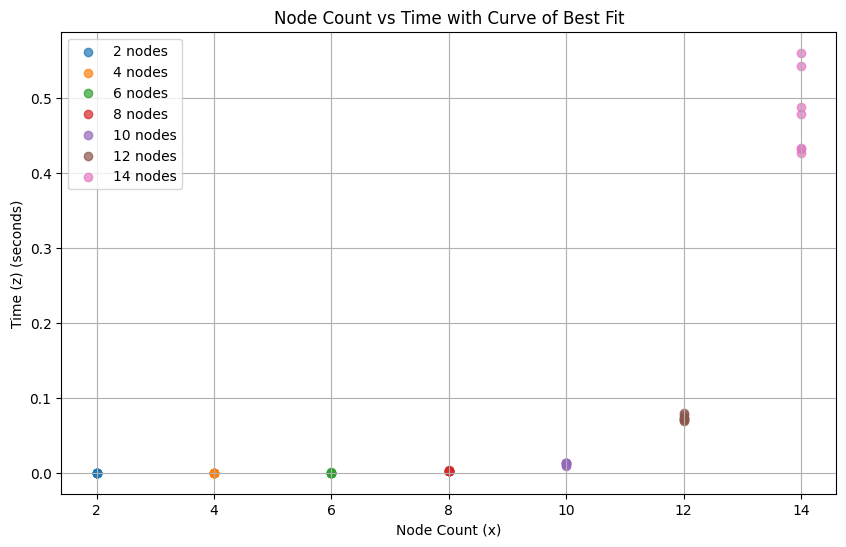

/tmp/ipykernel_1119264/650562113.py:36: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['y (sample_size)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:36: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['y (sample_size)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:36: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['y (sample_size)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:36: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['y (sample_size)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:36: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['y (sample_size)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:36: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(subset['y (sample_size)'], subset['z (time)'], 2)
/tmp/ipykernel_1119264/650562113.py:36: RankWarning: Polyfit may be poorly c

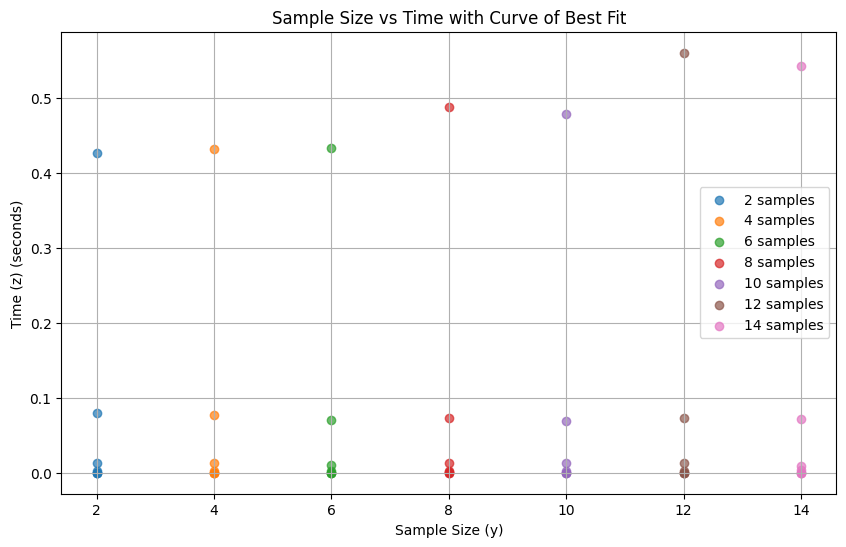

TypeError: expected 1D vector for x

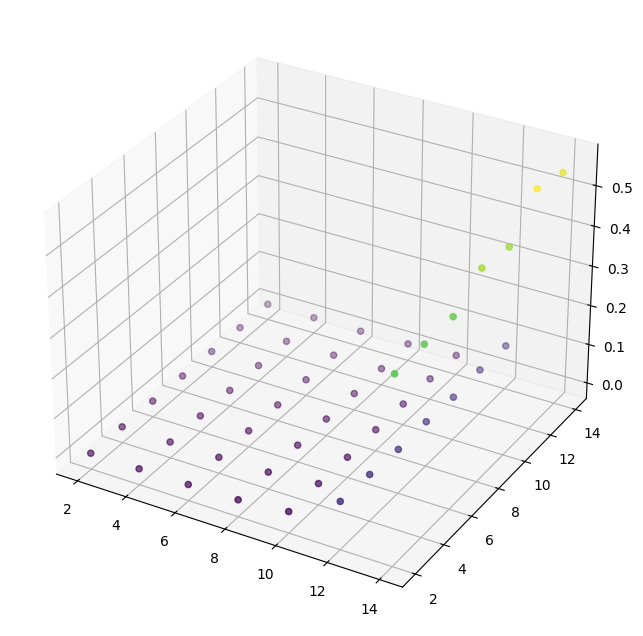

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Read the CSV file
data = pd.read_csv('tsp_analysis_results.csv')

# Plot 1: (x, z) - node_count vs time (scatter plot with curve fitting)
plt.figure(figsize=(10, 6))
for node_count in data['x (node_count)'].unique():
    subset = data[data['x (node_count)'] == node_count]
    # Scatter plot
    plt.scatter(subset['x (node_count)'], subset['z (time)'], label=f'{node_count} nodes', alpha=0.7)

    # Fit a polynomial of degree 2 (quadratic) to the data for curve fitting
    p = np.polyfit(subset['x (node_count)'], subset['z (time)'], 2)
    y_fit = np.polyval(p, subset['x (node_count)'])
    plt.plot(subset['x (node_count)'], y_fit, linestyle='--', color='black')

plt.xlabel('Node Count (x)')
plt.ylabel('Time (z) (seconds)')
plt.title('Node Count vs Time with Curve of Best Fit')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: (y, z) - sample_size vs time (scatter plot with curve fitting)
plt.figure(figsize=(10, 6))
for sample_size in data['y (sample_size)'].unique():
    subset = data[data['y (sample_size)'] == sample_size]
    # Scatter plot
    plt.scatter(subset['y (sample_size)'], subset['z (time)'], label=f'{sample_size} samples', alpha=0.7)

    # Fit a polynomial of degree 2 (quadratic) to the data for curve fitting
    p = np.polyfit(subset['y (sample_size)'], subset['z (time)'], 2)
    y_fit = np.polyval(p, subset['y (sample_size)'])
    plt.plot(subset['y (sample_size)'], y_fit, linestyle='--', color='black')

plt.xlabel('Sample Size (y)')
plt.ylabel('Time (z) (seconds)')
plt.title('Sample Size vs Time with Curve of Best Fit')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: (x, y, z) - 3D scatter plot with curve fitting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D
ax.scatter(data['x (node_count)'], data['y (sample_size)'], data['z (time)'], c=data['z (time)'], cmap='viridis', marker='o')

# Fit a surface for the 3D data using np.polyfit (2nd-degree polynomial for each axis)
x_vals = data['x (node_count)']
y_vals = data['y (sample_size)']
z_vals = data['z (time)']

# Fit a 2nd-degree polynomial (quadratic) for the surface
p = np.polyfit(np.vstack((x_vals, y_vals)).T, z_vals, 2)
z_fit = np.polyval(p, np.vstack((x_vals, y_vals)).T)

# Plot the fitted surface
ax.plot_trisurf(x_vals, y_vals, z_fit, cmap='viridis', alpha=0.5)

ax.set_xlabel('Node Count (x)')
ax.set_ylabel('Sample Size (y)')
ax.set_zlabel('Time (z) (seconds)')
ax.set_title('Node Count, Sample Size vs Time with 3D Curve Fitting')
plt.show()


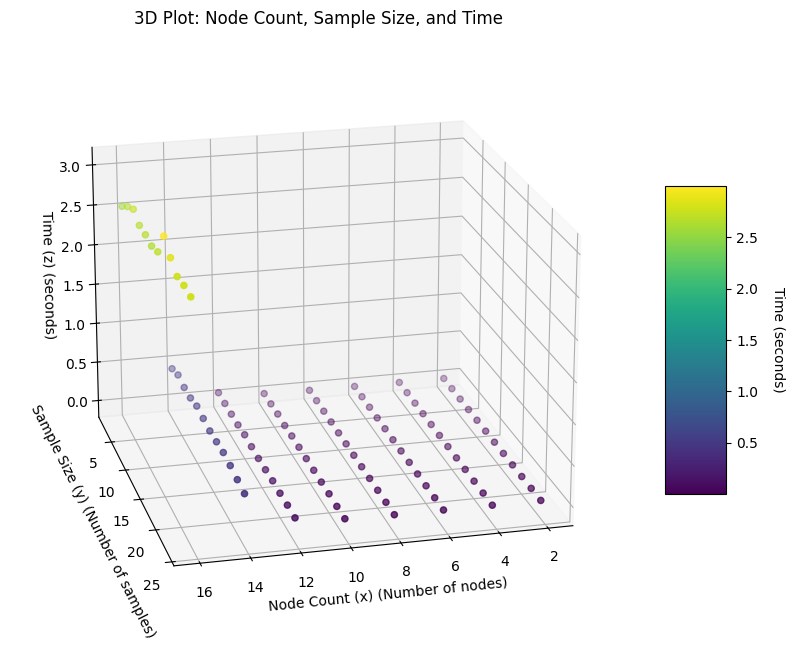

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Read the CSV file
data = pd.read_csv('tsp_analysis_results.csv')

# Plot 3: (x, y, z) - 3D scatter plot (node_count, sample_size, time)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot, using time (z) for color mapping
scatter = ax.scatter(data['x (node_count)'], data['y (sample_size)'], data['z (time)'], 
                     c=data['z (time)'], cmap='viridis')

# Set axis labels and title
ax.set_xlabel('Node Count (x) (Number of nodes)')
ax.set_ylabel('Sample Size (y) (Number of samples)')
ax.set_zlabel('Time (z) (seconds)')
ax.set_title('3D Plot: Node Count, Sample Size, and Time')

# Set the viewing angle
ax.view_init(elev=20, azim=76)

# Add the colorbar (heatmap) to the plot
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)

# Adjust colorbar label position to avoid overlap
cbar.set_label('Time (seconds)', rotation=270, labelpad=20)  # Increase labelpad to move it away

# Show the plot
plt.show()


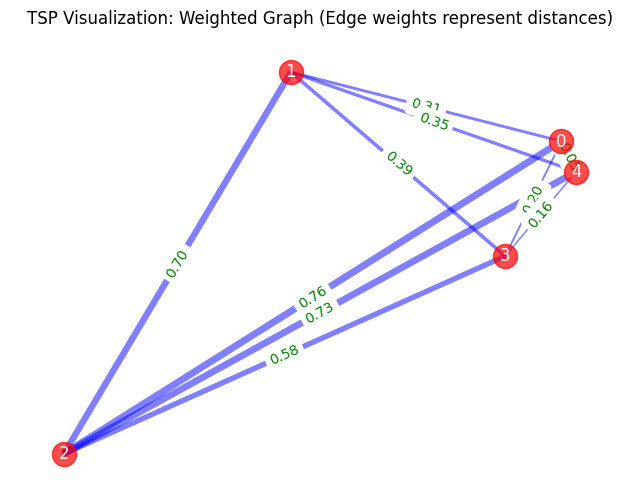

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Example: 5 cities with their coordinates (x, y)
coordinates = np.array([
    [0.6395, 0.8589],
    [0.3487, 0.9769],
    [0.1046, 0.3257],
    [0.5791, 0.6631],
    [0.6554, 0.8072]
])

# Calculate the distance matrix between cities (Euclidean distance)
def calculate_distance_matrix(coords):
    dist_matrix = np.linalg.norm(coords[:, np.newaxis, :] - coords[np.newaxis, :, :], axis=-1)
    return dist_matrix

# Create a graph based on the number of cities
def create_weighted_graph(coords):
    G = nx.Graph()
    num_nodes = len(coords)
    
    # Add nodes
    for i in range(num_nodes):
        G.add_node(i, pos=(coords[i][0], coords[i][1]))
    
    # Add edges with weights (distance between cities)
    distance_matrix = calculate_distance_matrix(coords)
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            weight = distance_matrix[i][j]
            G.add_edge(i, j, weight=weight)
    
    return G, distance_matrix

# Plot the graph with edge labels showing weights
def plot_graph(G, distance_matrix, coords):
    pos = nx.get_node_attributes(G, 'pos')
    
    plt.figure(figsize=(8, 6))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='red', alpha=0.7)
    
    # Draw edges with varying thickness based on the distance
    edges = G.edges(data=True)
    edge_weights = [data['weight'] for u, v, data in edges]
    
    # Normalize edge weights for visualization (scaling factor for edge width)
    weight_max = max(edge_weights)
    width_scaling = [weight / weight_max * 5 for weight in edge_weights]  # Scaling factor for edge width
    
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=width_scaling, alpha=0.5, edge_color='blue')
    
    # Draw labels for nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='white')
    
    # Draw edge labels with the weight of each edge
    edge_labels = {(i, j): f'{distance_matrix[i][j]:.2f}' for i, j in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='green')
    
    # Title and axis
    plt.title("TSP Visualization: Weighted Graph (Edge weights represent distances)")
    plt.axis('off')  # Hide the axis
    plt.show()

# Example graph visualization
G, distance_matrix = create_weighted_graph(coordinates)
plot_graph(G, distance_matrix, coordinates)


In [ ]:
!pip install pysr

In [ ]:
import pandas as pd
from pysr import PySRRegressor
import matplotlib.pyplot as plt

# Step 1: Load the data from the CSV file
data = pd.read_csv('tsp_analysis_results.csv')

# Extract relevant columns: node_count (x), sample_size (y), and time (z)
X = data[['x (node_count)', 'y (sample_size)']].values  # Features (x, y)
y = data['z (time)'].values  # Target variable (z)

# Step 2: Set up the symbolic regressor
model = PySRRegressor(
    niterations=20,  # Number of iterations to run the symbolic regression
    populations=100,  # Population size
    sympy_print=False,  # Turn off sympy printing for concise output
    verbosity=1,  # Increase verbosity to see intermediate outputs
)

# Step 3: Fit the model
model.fit(X, y)

# Step 4: Print the best equations found by symbolic regression
print("Best symbolic regression equations found:")
print(model)

# Step 5: Make predictions (optional, if you want to predict new values)
predictions = model.predict(X)

# Optional: Visualize the prediction vs actual time
plt.scatter(y, predictions)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Ideal line (y = x)
plt.xlabel('Actual Time (z)')
plt.ylabel('Predicted Time (z)')
plt.title('Symbolic Regression: Actual vs Predicted Time')
plt.show()


In [1]:
import pandas as pd
from pysr import PySRRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Load the data from the CSV file
data = pd.read_csv('tsp_analysis_results.csv')

# Extract relevant columns: node_count (x), sample_size (y), and time (z)
X = data[['x (node_count)', 'y (sample_size)']].values  # Features (x, y)
y = data['z (time)'].values  # Target variable (z)

# x0 = node_count
# x1 = sample_size

# Step 2: Set up the symbolic regressor
model = PySRRegressor(
    niterations=100,  # Number of iterations to run the symbolic regression
    populations=100,  # Population size
    unary_operators=['square', "exp", "sqrt", 'cube', 'log', 'sin'], 
    binary_operators=["+", "*", "-", "/", "^"],
    verbosity=1,  # Increase verbosity to see intermediate outputs
)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [7]:
import sympy as sp

from math import log, sin

x0, x1 = sp.symbols('x0 x1')


equation = 1.3265738*(sp.log(sp.log(x0))**2)**(x0 + sp.log(x1) + sp.sin(0.4487219*x1))


In [18]:
equation

1.3265738*(log(log(x0))**2)**(x0 + log(x1) + sin(0.4487219*x1))

In [ ]:
X

In [13]:
predictions = np.array([equation.evalf(subs={x0: row[0], x1: row[1]}) for row in X], dtype=np.float64)

In [16]:
rmse = np.sqrt(np.mean((predictions - y)**2))

In [20]:
X[0]

array([2, 2])

In [21]:
y[0]

3.993511199951172e-05

In [17]:
rmse

0.027798768275283187

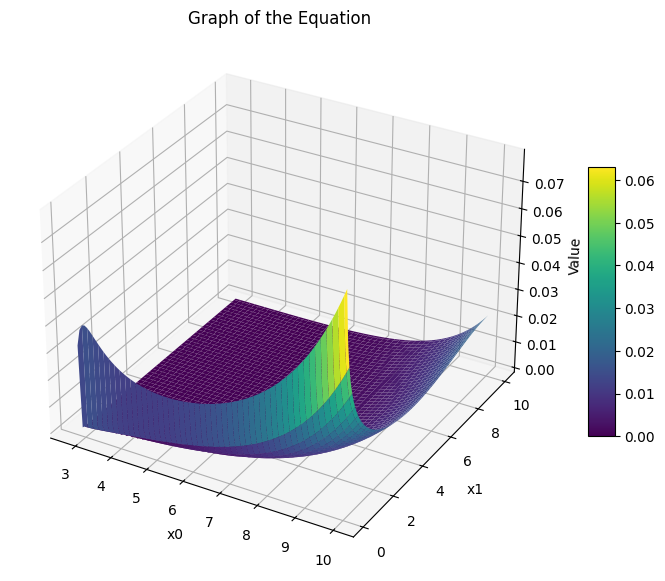

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

# Define symbolic variables and equation
x0, x1 = sp.symbols('x0 x1')
equation = 1.3265738 * (sp.log(sp.log(x0))**2)**(x0 + sp.log(x1) + sp.sin(0.4487219 * x1))

# Convert symbolic equation to a numerical function
numerical_eq = sp.lambdify((x0, x1), equation, modules='numpy')

# Define the range of x0 and x1
x0_vals = np.linspace(np.e + 0.1, 10, 100)  # x0 > e
x1_vals = np.linspace(0.1, 10, 100)        # x1 > 0

# Create a meshgrid for plotting
X0, X1 = np.meshgrid(x0_vals, x1_vals)

# Evaluate the equation on the grid
Z = numerical_eq(X0, X1)

# Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X0, X1, Z, cmap='viridis')

# Add labels and title
ax.set_title("Graph of the Equation")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("Value")

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

# Show the plot
plt.show()


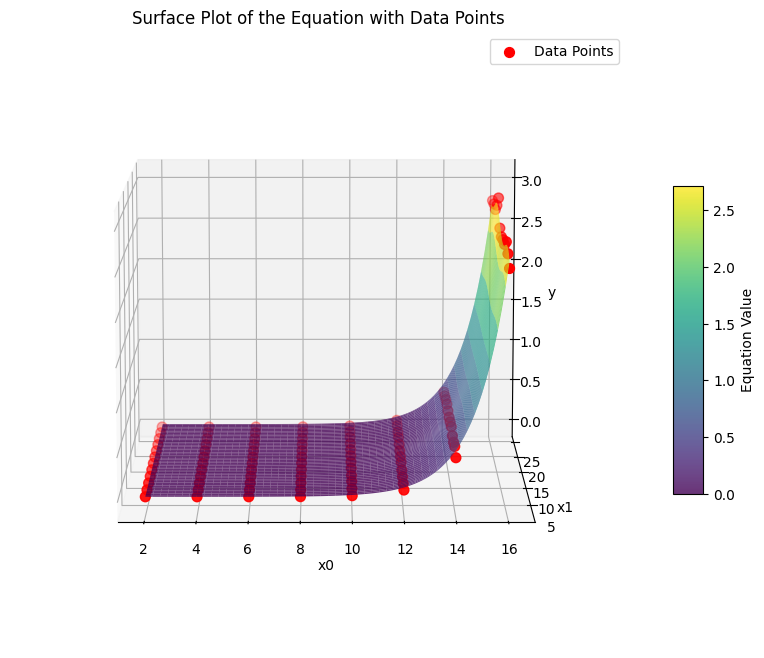

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

# Define symbolic variables and equation
x0, x1 = sp.symbols('x0 x1')
equation = 1.3265738 * (sp.log(sp.log(x0))**2)**(x0 + sp.log(x1) + sp.sin(0.4487219 * x1))

# Convert symbolic equation to a numerical function
numerical_eq = sp.lambdify((x0, x1), equation, modules='numpy')

# Define X (input data) and y (target values)
# X = np.array([
#     [2.7183, 2],
#     [3, 4],
#     [3.5, 6],
#     [4, 8],
#     [4.5, 10],
#     [5, 12]
# ])  # Ensure x0 > e and x1 > 0
# y = np.array([10, 15, 25, 35, 50, 65])  # Replace with actual target values

# Separate X into x0 and x1
x0_data = X[:, 0]
x1_data = X[:, 1]

# Define the range for x0 and x1 for the surface plot
x0_vals = np.linspace(2, 16, 100)  # x0 > e
x1_vals = np.linspace(2, 25, 100)     # x1 > 0

# Create a meshgrid for the surface
X0, X1 = np.meshgrid(x0_vals, x1_vals)

# Evaluate the equation on the meshgrid
Z = numerical_eq(X0, X1)

# Plot the surface and scatter points
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of the equation
surf = ax.plot_surface(X0, X1, Z, cmap='viridis', alpha=0.8)

# Scatter plot for the data points
ax.scatter(x0_data, x1_data, y, color='red', label='Data Points', s=50)

ax.view_init(elev=10, azim=-90)

# Add labels, legend, and color bar
ax.set_title("Surface Plot of the Equation with Data Points")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("y")
fig.colorbar(surf, shrink=0.5, aspect=10, label="Equation Value")
ax.legend()

# Show the plot
plt.show()


In [36]:
X[-1], y[-1]

(array([16, 24]), 2.7795235315958657)

In [40]:
target = [14, 14]

# Find the index of the target row
index = np.where((X == target).all(axis=1))[0]

# Output the result
if len(index) > 0:
    print(f"Index of {target}: {index[0]}")
else:
    print(f"{target} not found in the array.")

Index of [14, 14]: 78


In [43]:
equation

1.3265738*(log(log(x0))**2)**(x0 + log(x1) + sin(0.4487219*x1))

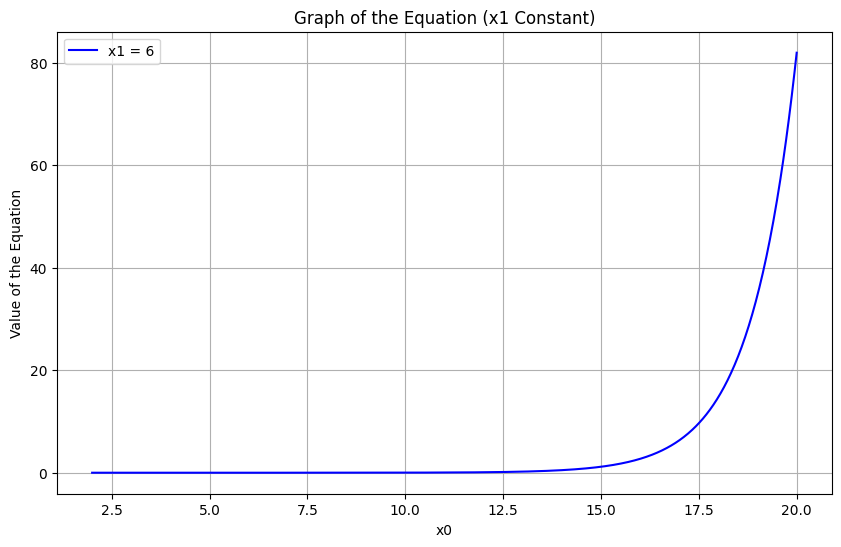

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

x1_constant = 6  # Example value; change as needed

# Define symbolic variables and equation
x0, x1 = sp.symbols('x0 x1')
# equation = 1.3265738 * (sp.log(sp.log(x0))**2)**(x0 + sp.log(x1) + sp.sin(0.4487219 * x1))
equation = 1.3265738 * (sp.log(sp.log(x0))**2)**(x0 + sp.log(x1_constant) + sp.sin(0.4487219 * x1_constant))


# Convert symbolic equation to a numerical function
numerical_eq = sp.lambdify((x0), equation, modules='numpy')

# Define a constant value for x1

# Define the range for x0
x0_min = 2  # Minimum bound (slightly greater than e to satisfy the domain)
x0_max = 20          # Maximum bound

# Generate x0 values within the specified range
x0_vals = np.linspace(x0_min, x0_max, 1000)

# Evaluate the equation for x0 with x1 constant
y_vals = numerical_eq(x0_vals)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x0_vals, y_vals, label=f"x1 = {x1_constant}", color='blue')

# Add labels, title, and legend
plt.title("Graph of the Equation (x1 Constant)")
plt.xlabel("x0")
plt.ylabel("Value of the Equation")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [55]:
x1_constant

6